In [1]:
from gensim.models import KeyedVectors

import seaborn as sns

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import re

import itertools
import collections

import pandas as pd

import matplotlib.pyplot as plt

import nltk
stopwords = nltk.corpus.stopwords.words('spanish')
# nltk.download()

import numpy as np

from scipy import interpolate

import time

In [2]:
pattern=['[^¡!.,?«»]+']

def remove_punctuation(word):
    for pat in pattern:
        return(re.findall(pat,word)[0])

In [3]:
model = KeyedVectors.load_word2vec_format('../sbw_vectors.bin', binary = True)

In [8]:
text = [
    'Los informes que tenía indicaban que buena parte del río era navegable hasta llegar al pie de la',
    'cordillera. No es así, desde luego. Vamos en un lanchón de quilla plana movido por un motor',
    'diésel que lucha con asmática terquedad contra la corriente. En la proa hay un techo de lona',
    'sostenido por soportes de hierro de los que penden hamacas, dos a babor y dos a estribor. El',
    'resto del pasaje, cuando hay, se amontona en mitad de la embarcación, sobre un piso de hojas',
    'de palma que protege a los viajeros del calor que despiden las planchas de metal. Sus pasos',
    'retumban en el vacío de la cala con un eco fantasmal y grotesco. A cada rato nos detenemos',
    'para desvarar el lanchón encallado en los bancos de arena que se forman de repente y luego',
    'desaparecen, según los caprichos de la corriente. De las cuatro hamacas, dos las ocupamos los',
    'pasajeros que subimos en Puerto España y las otras dos son para el mecánico y el práctico. El',
    'Capitán duerme en la proa bajo un parasol de playa multicolor que él va girando según la',
    'posición del sol. Siempre está en una semiebriedad, que sostiene sabiamente con dosis',
    'recurrentes aplicadas en tal forma que jamás se escapa de ese ánimo en que la euforia alterna',
    'con el sopor de un sueño que nunca lo vence por completo. Sus órdenes no tienen relación',
    'alguna con la trayectoria del viaje y siempre nos dejan una irritada perplejidad: «¡Arriba el',
    'ánimo! ¡Ojo con la brisa! ¡Recia la lucha, fuera las sombras! ¡El agua es nuestra! ¡Quemen la',
    'sonda!», y así todo el día y buena parte de la noche. Ni el mecánico ni el práctico prestan la',
    'menor atención a esa letanía que, sin embargo, en alguna forma los sostiene despiertos y alertas',
    'y les transmite la destreza necesaria para sortear las incesantes trampas del Xurandó.'
]

In [9]:
text_list = [lines.lower().split(' ') for lines in text]

In [10]:
removed_punctuation = [ [ remove_punctuation(word) for word in line ] 
                       for line in text_list ]

In [11]:
# flattened = [word 
#              for line in removed_punctuation
#              for word in line ]

flattened = list(itertools.chain(*removed_punctuation))

In [12]:
set(flattened)

{'a',
 'agua',
 'al',
 'alertas',
 'alguna',
 'alterna',
 'amontona',
 'aplicadas',
 'arena',
 'arriba',
 'asmática',
 'así',
 'atención',
 'babor',
 'bajo',
 'bancos',
 'brisa',
 'buena',
 'cada',
 'cala',
 'calor',
 'capitán',
 'caprichos',
 'completo',
 'con',
 'contra',
 'cordillera',
 'corriente',
 'cuando',
 'cuatro',
 'de',
 'dejan',
 'del',
 'desaparecen',
 'desde',
 'despiden',
 'despiertos',
 'destreza',
 'desvarar',
 'detenemos',
 'diésel',
 'dos',
 'dosis',
 'duerme',
 'día',
 'eco',
 'el',
 'embarcación',
 'embargo',
 'en',
 'encallado',
 'era',
 'es',
 'esa',
 'escapa',
 'ese',
 'españa',
 'estribor',
 'está',
 'euforia',
 'fantasmal',
 'forma',
 'forman',
 'fuera',
 'girando',
 'grotesco',
 'hamacas',
 'hasta',
 'hay',
 'hierro',
 'hojas',
 'incesantes',
 'indicaban',
 'informes',
 'irritada',
 'jamás',
 'la',
 'lanchón',
 'las',
 'les',
 'letanía',
 'llegar',
 'lo',
 'lona',
 'los',
 'lucha',
 'luego',
 'mecánico',
 'menor',
 'metal',
 'mitad',
 'motor',
 'movido',
 'mu

In [13]:
counts = collections.Counter(flattened)
counts.most_common(10)

[('de', 18),
 ('la', 16),
 ('que', 14),
 ('el', 12),
 ('en', 11),
 ('y', 10),
 ('los', 7),
 ('un', 7),
 ('del', 6),
 ('con', 6)]

In [14]:
word_count = pd.DataFrame(counts.most_common(10), columns=('words','counts'))
word_count.tail()

,words,counts
5,y,10
6,los,7
7,un,7
8,del,6
9,con,6


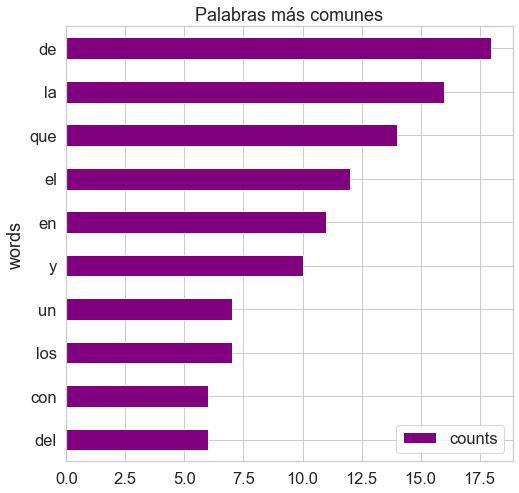

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_count.sort_values(by='counts').plot.barh(x='words',
                      y='counts',
                      ax=ax,
                      color="purple")

ax.set_title("Palabras más comunes")

plt.show()

In [12]:
counts.most_common(1)[0][0]

'de'

In [80]:
distances = [ [ model.distance( counts.most_common(1)[0][0], word ) 
                for word in line if word in model.vocab] 
                for line in removed_punctuation ]

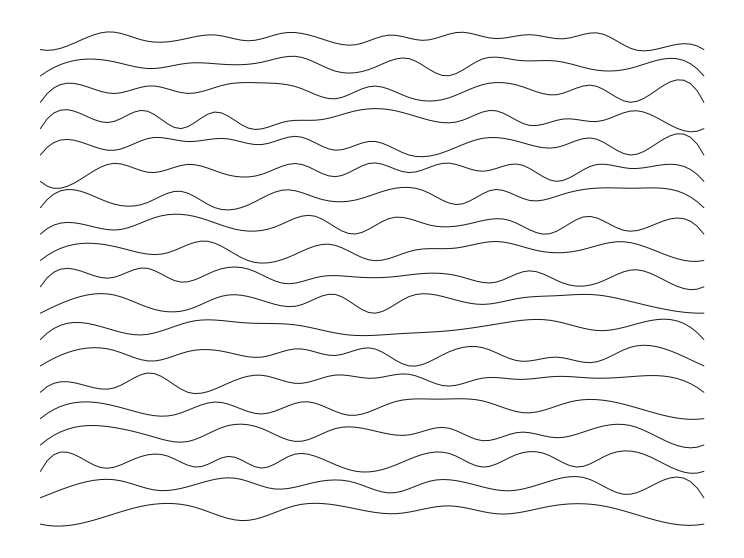

In [81]:
fig, ax = plt.subplots(figsize=(13.08,10))
fig.patch.set_facecolor('white')

ax.axis('off')

interp_functions = []
x_interp = np.linspace(0,1,100)
y_interp = np.zeros((len(text),))

lines = np.empty((len(text),x_interp.shape[0]))


for i in range(0,len(text)):
    
    x = np.linspace(0,1,len(distances[i])+2)
    distances[i].append(0)
    distances[i].insert(0,0)
    y = np.array(distances[i])
    f = interpolate.interp1d(x, y,kind='cubic')
    interp_functions.append(f)
    lines[i] = f(x_interp)
    y_interp[i] = -(1.2*i)
    
    ax.plot(x_interp,(lines[i]+y_interp[i]),'k',linewidth = 1)
    
plt.savefig('text_lines.png',dpi=300, transparent=True)

In [82]:
ax.get_ylim()

(-22.815543002666892, 1.927413489617377)

In [83]:
ax.get_xlim()

(-0.05, 1.05)

In [84]:
lines.shape

(19, 100)

In [85]:
xx, yy = np.meshgrid(x_interp, y_interp)
z = lines
f_interp_2D = interpolate.interp2d(x_interp, y_interp, z, kind='cubic')

In [86]:
len(text)

19

In [87]:
period = np.abs(y_interp[-1]/(19*2))

In [88]:
period

0.5684210526315789

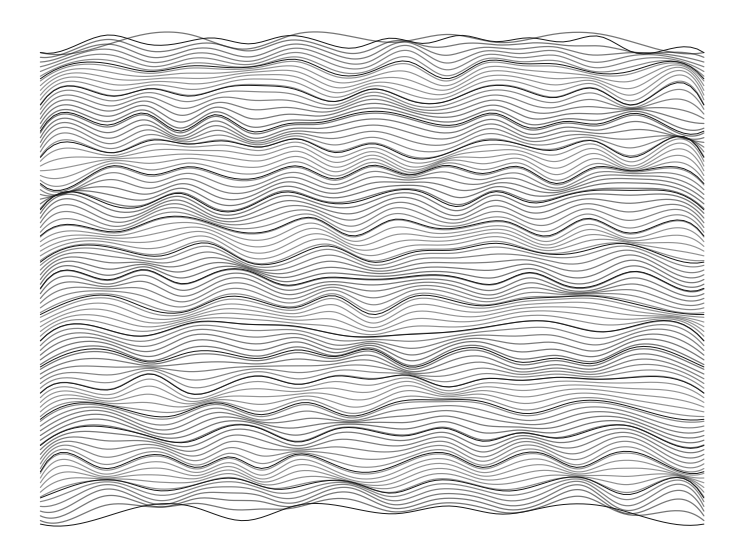

In [89]:
fig, ax = plt.subplots(figsize=(13.08,10))
fig.patch.set_facecolor('white')

ax.axis('off')

xnew = np.linspace(0, 1, 300)
ynew = np.linspace(y_interp[0], y_interp[-1], 400)
znew = f_interp_2D(xnew, ynew)

for i in range(0,znew.shape[0]):
    if (i%4==0):
        alpha_value = (0.25*np.cos(ynew[i]/period)+1.75)/2
        ax.plot(xnew, znew[-i, :]+ynew[i], 'k', alpha=0.6*np.exp((alpha_value-1)), linewidth=1.25*np.exp(0.3*(alpha_value-1)) )
    
    
for i in range(0,len(text)):
    
    x = np.linspace(0,1,len(distances[i]))
    y = np.array(distances[i])
    
    ax.plot(x_interp,lines[i]+y_interp[i],'k', linewidth = 1,alpha=1)
    
# plt.savefig('full_lines.png',dpi=300, transparent=True)

In [90]:
print('{:03d}'.format(100))

100


In [91]:
print(ax.get_xlim(),ax.get_ylim())

(-0.05, 1.05) (-22.82274746614759, 2.078707222712044)


SystemError: <built-in method write of _io.BufferedWriter object at 0x000002BD48F39888> returned a result with an error set

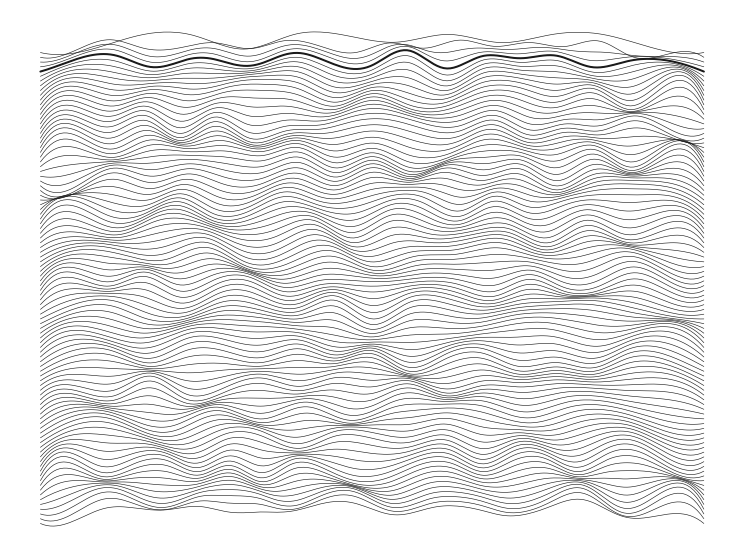

In [92]:
fig, ax = plt.subplots(figsize=(13.08,10))
fig.patch.set_facecolor('white')

ax.axis('off')

xnew = np.linspace(0, 1, 200)
ynew = np.linspace(y_interp[0], y_interp[-1], 100)
znew = f_interp_2D(xnew, ynew)

for i in range(0,znew.shape[0]):
    alpha_value = (0.25*np.cos(ynew[i]/period)+1.75)/2
    ax.plot(xnew, znew[-i, :]+ynew[i], 'k', alpha=1, linewidth=0.6 )
    
line, = ax.plot(xnew, znew[-0, :]+ynew[0], 'k', alpha=1, linewidth=2 )
    
for i in range(0,znew.shape[0]):
    line.set_ydata( znew[-i, :]+ynew[i] )
    fig.canvas.draw_idle()
    plt.savefig('video/frame{:04d}.png'.format(i),dpi=300, transparent=True)

In [ ]:
distance

In [56]:
znew.shape

(100, 300)

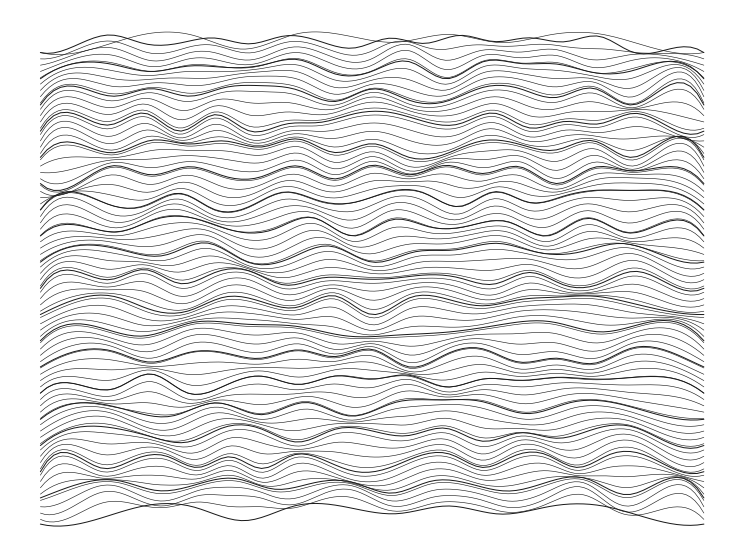

In [95]:
fig, ax = plt.subplots(figsize=(13.08,10))
fig.patch.set_facecolor('white')

xnew = np.linspace(0, 1, 150)
ynew = np.linspace(y_interp[0], y_interp[-1], 300)
znew = f_interp_2D(xnew, ynew)

for j in range(0,znew.shape[0]+1):
    ax.clear()
    ax.axis('off')
    ax.set_ylim((-22.822728435865557, 2.0783075867892773))
    
    for k in range(0,len(text)):

        ax.plot(x_interp,(lines[k]+y_interp[k]),'k',linewidth = 1)

    for i in range(0,znew.shape[0]):        
        if i<j and i%4 == 0: 
            ax.plot(xnew, znew[-i, :]+ynew[i], 'k', linewidth=0.6 )
    
    if (j<znew.shape[0]): ax.plot(xnew, znew[-j, :]+ynew[j], 'k', alpha=1, linewidth=2 )
    fig.canvas.draw_idle()
    plt.savefig('video/frame{:04d}.png'.format(j),dpi=300, transparent=True)
    print('frames left {}'.format(znew.shape[0]-j),end='\r')

In [158]:
line.set_ydata( znew[-40, :]+ynew[40] )
fig.canvas.draw_idle()

In [20]:
from osc_gen import visualize
from osc_gen import wavetable
from osc_gen import wavfile
from osc_gen import zosc
from osc_gen import sig
from osc_gen import dsp

In [164]:
sg = sig.SigGen(num_points=1024)
wt = wavetable.WaveTable(len(text))

# sin AM modulation to avoid clipping and phase issues
lines = lines * np.array([np.sin(8*np.pi*x_interp)]*lines.shape[0])

# Write to file
wt.waves = [sg.arb(lines[len(text)-(i+1)]) for i in range(0,len(text))]
wt.to_wav('wavetable6.wav')

In [165]:
visualize.plot_wavetable(wt)

In [166]:
import IPython.display as ipd
ipd.Audio('wavetable7.wav') # load a local WAV file

ValueError: rate must be specified when data is a numpy array or list of audio samples.